# Quick tutorial for using a Deep Sets model to find new open cluster members

This notebook presents a minimal example of how to use a pretrained model to find new members of an open cluster. For an in-depth walkthrough of the method, see the other notebook.

Here we first create a directory to store our data and results in. 

In [1]:
import os

data_dir = './data'
if not os.path.exists(data_dir):
    os.mkdir(data_dir)

## Data preparation

To find new members of an open cluster, our method requires a number of its properties, its isochrone and a set of already established probable members. We can download all of these with the `download_startup_data` function. 

In [2]:
from gaia_oc_amd import download_startup_data

download_startup_data(save_dir=data_dir)

Downloaded cluster parameters from Cantat-Gaudin et al. (2020), saved data at /home/matthijs/git/gaia_oc_amd/examples/data/cluster_parameters.csv
 
Querying isochrones... done


Downloaded 400 isochrones from log(age)=6 to log(age)=9.99 with Z=0.0152, saved data at /home/matthijs/git/gaia_oc_amd/examples/data/isochrones.dat.
 
Downloaded membership lists from Cantat-Gaudin et al. (2018), saved data at /home/matthijs/git/gaia_oc_amd/examples/data/cg18_members.csv
Downloaded membership lists from Cantat-Gaudin & Anders (2020), saved data at /home/matthijs/git/gaia_oc_amd/examples/data/cg20a_members.csv
Downloaded membership lists from Cantat-Gaudin et al. (2020), saved data at /home/matthijs/git/gaia_oc_amd/examples/data/cg20b_members.csv
Downloaded membership lists from Tarricq et al. (2022), saved data at /home/matthijs/git/gaia_oc_amd/examples/data/t22_members.csv


Now we also need to the data of sources in the vicinity the cluster, so we can determine their membership status. This data is obtained by performing a cone search in the Gaia archive at https://gea.esac.esa.int/archive/. Large queries require an account and the function which queries the Gaia archive expects a path to a file containing account credentials. A file can be made manually (username on the first line, password on the second) or by running the `create_gaia_credentials_file` function.

In [3]:
# from gaia_oc_amd import create_gaia_credentials_file

# create_gaia_credentials_file(save_path='./gaia_credentials')

After the cone search data has been obtained, we label the sources in the cone as either a candidate (i.e. potential member) or a non-member. Non-members, along with the members, are used for training the model, while the candidates are evaluated by a trained model. 

We can use the `build_sets` function to both download the cone search data and to perform the candidate selection process. The cone sources are also attributed with a number of features which are used by the model to determine their membership. The function saves the various sets of sources and the cluster data in a cluster-specific directory in `clusters_dir`.

Building sets for: ['NGC_1039']
Number of clusters: 1
 
Cluster: NGC_1039  (1 / 1)
Loading cluster parameters... done
INFO: Login to gaia TAP server [astroquery.gaia.core]
OK
INFO: Login to gaia data server [astroquery.gaia.core]
OK
INFO: Gaia data server logout OK [astroquery.gaia.core]
Preparing cone data... done
Creating member dataframes... done
Parsing cone...  done
 
Members: 369
Candidates: 18152
Non-members: 26646
 
Plotting candidates... 

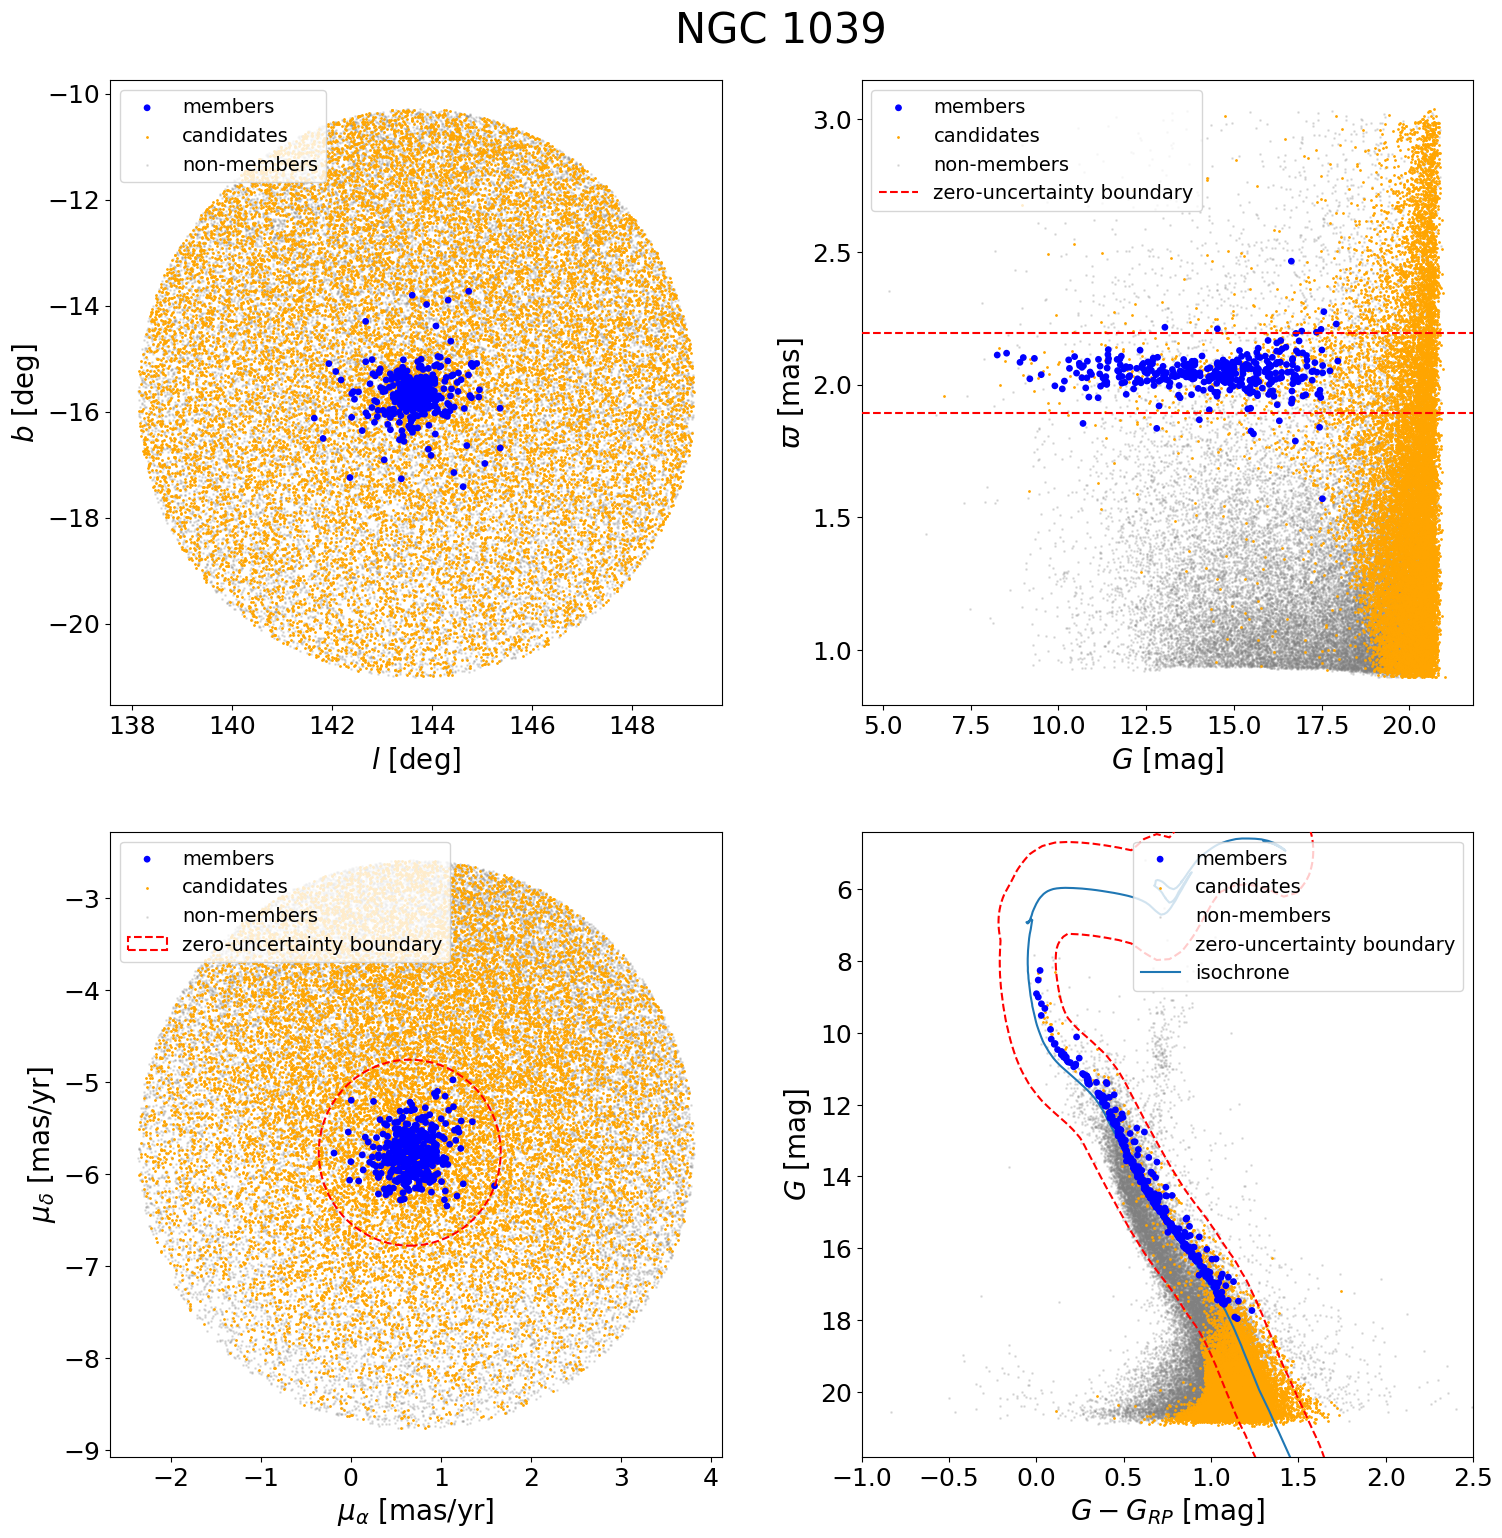

done
Saving source sets and cluster data... done, saved in /home/matthijs/git/gaia_oc_amd/examples/data/tutorial_clusters/NGC_1039
Cluster processed in 37.6 sec
 


In [4]:
from gaia_oc_amd import build_sets

clusters_dir = os.path.join(data_dir, 'tutorial_clusters')
build_sets('NGC_1039', clusters_dir=clusters_dir, show_plots=True)

## Using the model to determine new members

When the source data has been prepared, we can use the `evaluate_clusters` function the determine the membership probabilities of the candidates and plot the results. Unless specified otherwise, this function uses a pretrained model, which is included in the package. The plots include a comparison with another membership list. 

Evaluating candidates for: ['NGC_1039']
Number of clusters: 1
 
Cluster: NGC_1039  (1 / 1)


Evaluating candidate samples: 100%|███████████| 100/100 [00:46<00:00,  2.15it/s]


Creating plots... 

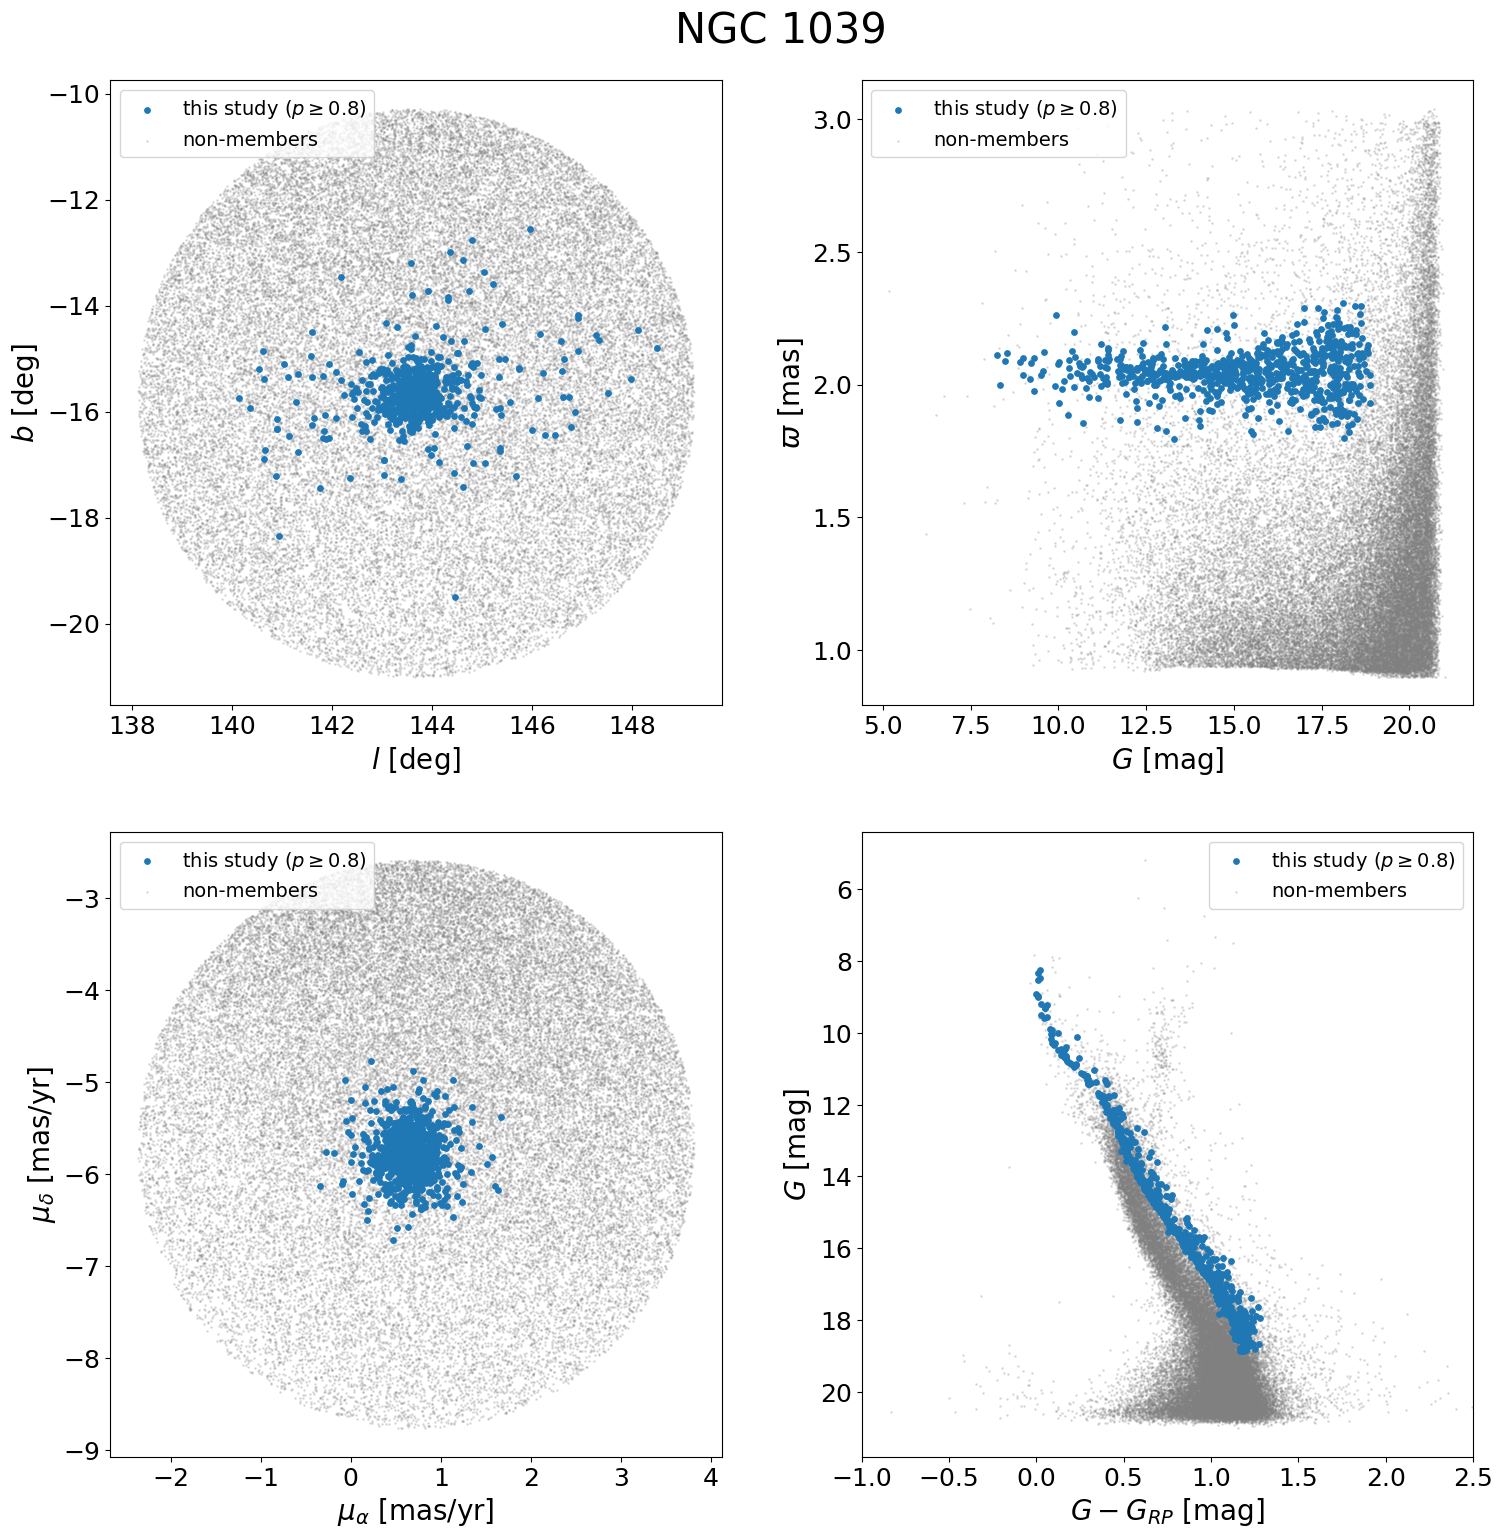

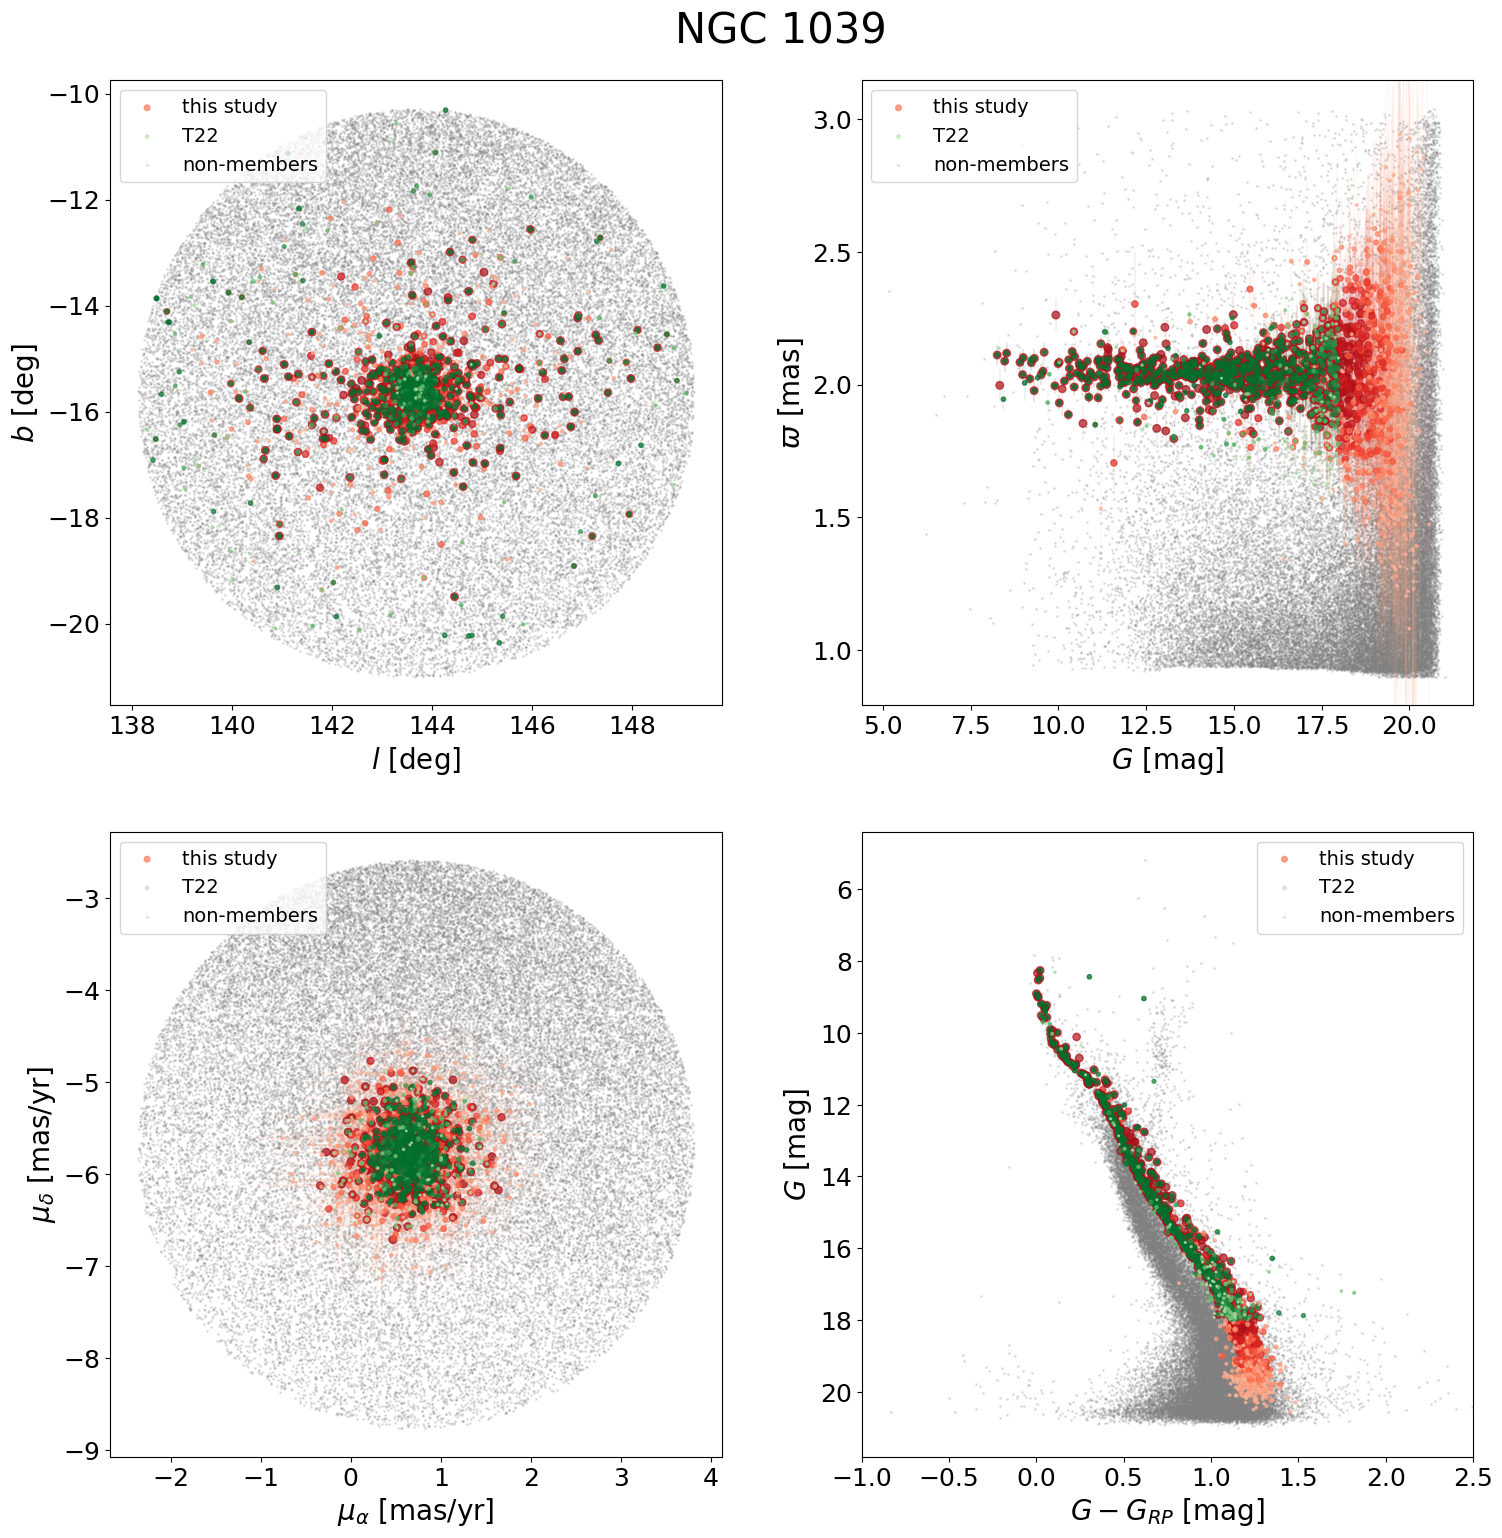

done, saved in /home/matthijs/git/gaia_oc_amd/examples/data/tutorial_clusters/NGC_1039
 


In [5]:
from gaia_oc_amd import evaluate_clusters

evaluate_clusters('NGC_1039', clusters_dir=clusters_dir, show_plots=True)